In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('global_air_quality_data_10000.csv')

In [4]:
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [5]:
df.tail()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
9995,Johannesburg,South Africa,2023-09-16,147.85,184.34,90.33,34.93,2.81,191.45,-1.92,65.22,15.48
9996,Berlin,Germany,2023-12-05,12.22,121.49,49.04,5.66,2.10,184.56,-9.81,12.16,10.75
9997,Moscow,Russia,2023-11-26,44.07,143.62,8.41,32.58,0.69,167.68,39.35,53.95,4.56
9998,Berlin,Germany,2023-02-03,67.43,96.79,43.23,29.19,6.01,148.50,26.21,58.54,2.71
9999,Bangkok,Thailand,2023-06-13,16.34,28.80,50.48,21.20,0.49,17.41,2.50,66.05,5.01


In [6]:
# all csv file values place decimal point 

In [7]:
df.shape

(10000, 12)

In [8]:
#checking the missing value in the dataset
df.isnull().sum()

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64

In [9]:
#there are no missing values in the dataset. Actual values are 1000 and we have 1000 data

In [10]:
#getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


In [11]:
#This is describe the dataset
df.describe()

,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
std,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628
min,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000
max,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000


In [12]:
df.columns

Index(['City', 'Country', 'Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
       'Temperature', 'Humidity', 'Wind Speed'],
      dtype='object')

In [13]:
#Forecasting with FB prophet Algoritham

In [14]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
data = pd.DataFrame()

In [16]:
data['ds'] = df['Date'].astype(str)

In [17]:
# Create 'ds' column in the new DataFrame
data['ds'] = df['Date'].dt.strftime('%Y-%m-%d')

In [18]:
# Create 'y' column in the new DataFrame
data['y'] = df['PM10']

In [19]:
data.head()

,ds,y
0,2023-03-19,25.19
1,2023-02-16,97.39
2,2023-11-13,57.22
3,2023-03-16,130.52
4,2023-04-04,36.62


In [20]:
from prophet import Prophet

In [21]:
# traning the prophet model
m = Prophet()
m.fit(data)

00:51:09 - cmdstanpy - INFO - Chain [1] start processing
00:51:10 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = m.make_future_dataframe(periods=365, freq='h')
future.tail()

,ds
696,2024-01-12 01:00:00
697,2024-01-12 02:00:00
698,2024-01-12 03:00:00
699,2024-01-12 04:00:00
700,2024-01-12 05:00:00


In [23]:
forecast = m.predict(future)#m = model
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
696,2024-01-12 01:00:00,105.333486,33.154810,171.087440
697,2024-01-12 02:00:00,105.368526,35.941238,179.720958
698,2024-01-12 03:00:00,105.393401,31.637127,169.969373
699,2024-01-12 04:00:00,105.407805,35.434966,173.125858
700,2024-01-12 05:00:00,105.411591,38.357407,173.978126


C:\Users\promed\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\promed\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


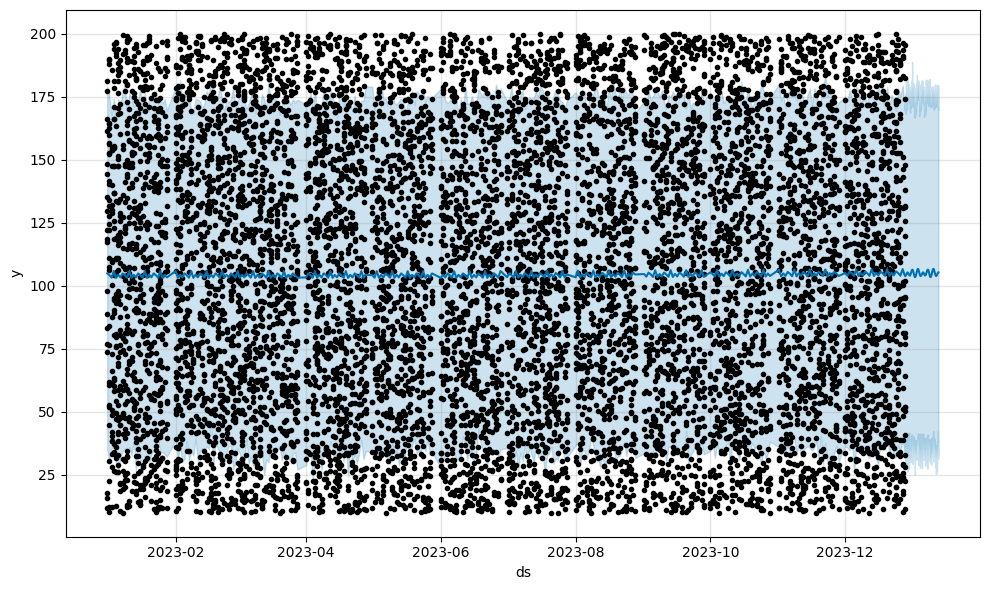

In [25]:
fig1 = m.plot(forecast)

In [ ]:
# scatter plot with numerous data points plotted on a Cartesian coordinate system. The x-axis is labeled ‘ds’ and shows dates ranging from February 2023 to December 2023, indicating the data spans almost a year. The y-axis is labeled ‘y’ and includes numerical values ranging from approximately 0 to 250.

C:\Users\promed\AppData\Roaming\Python\Python311\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


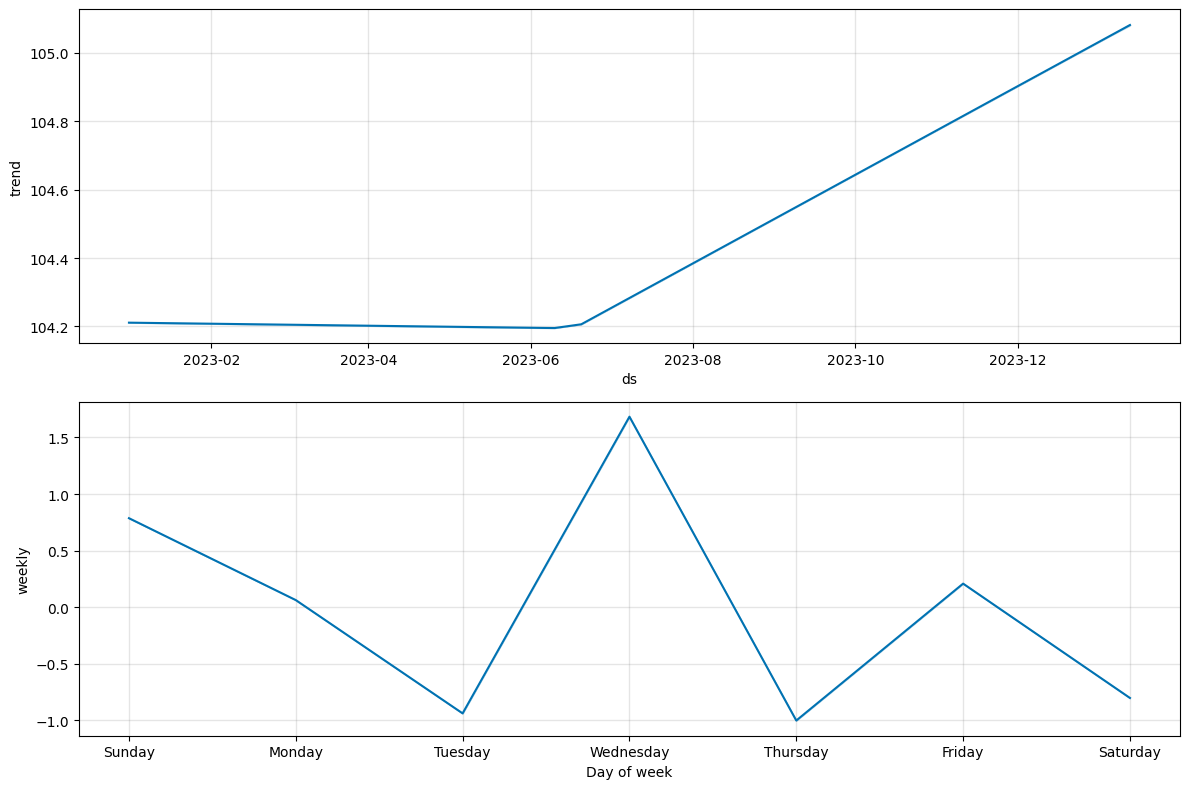

In [27]:
fig2 = m.plot_components(forecast)

# Customize the plot appearance
fig2.set_size_inches(12, 8)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# These graphs likely represent data trends over time and across days of the week,
# which could be useful for analysis in various fields such as economics, business analytics, or scientific research.

10


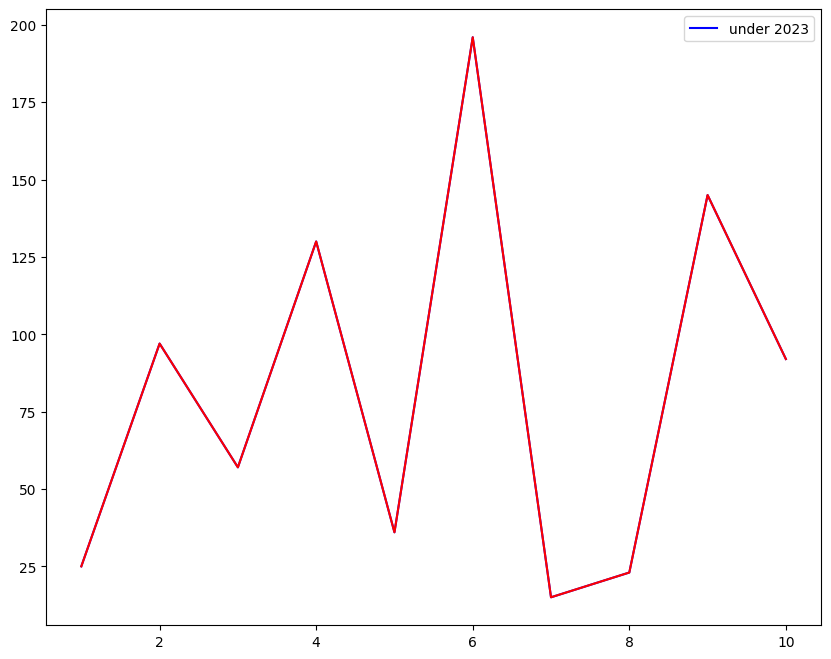

In [28]:
# Selecting the first 10 rows of data
dates = df['Date'].head(10)
pm10 = df['PM10'].head(10)
pm10 = [int(i) for i in pm10]
print(len(pm10))

pm10 = df['PM10'].head(10)
pm10 = [int(i) for i in pm10]

# Correcting the figure size syntax
plt.figure(figsize=(10, 8))

# Creating the length variable
length = [i for i in range(1, len(dates) + 1)]

# Plotting the data
plt.plot(length, pm10, color="blue", label='under 2023')
plt.plot(length, pm10, color="red")

# Adding legend
plt.legend()

# Displaying the plot
plt.show()


In [ ]:
# The graph visualizes the first 10 rows of data from the ‘Date’ and ‘PM10’ columns,
# plotting the ‘PM10’ values over the first 10 dates. The code demonstrates data manipulation using pandas and data visualization using matplotlib.

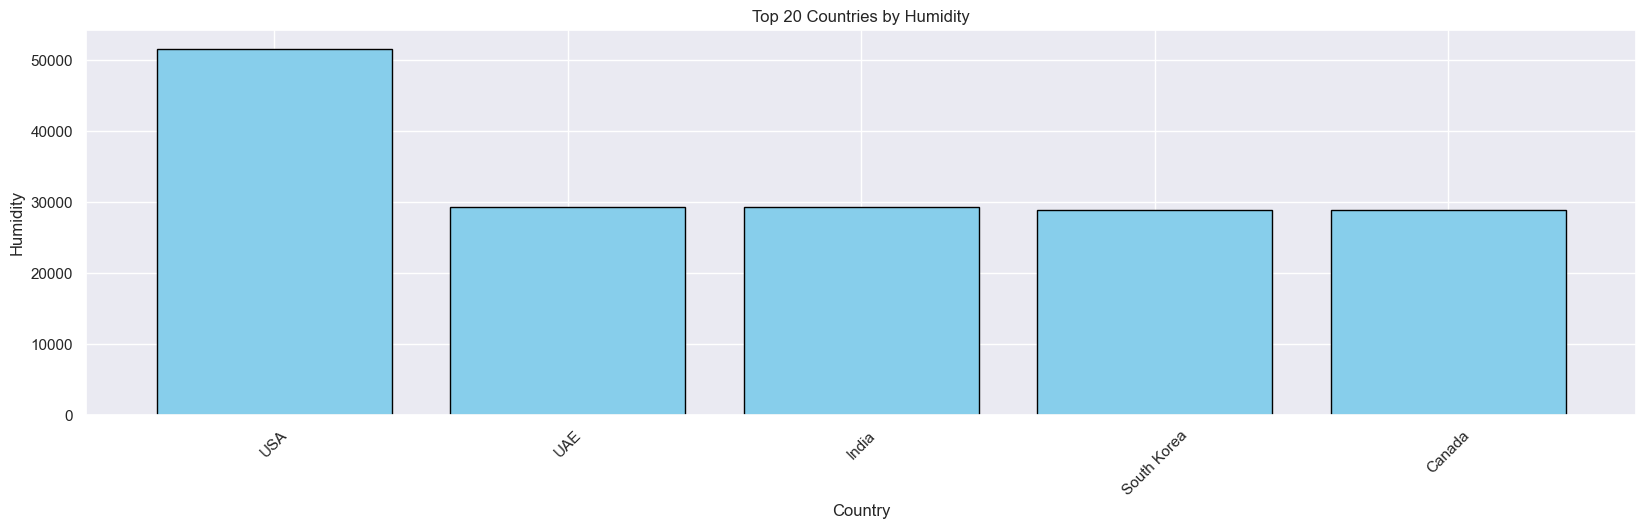

In [29]:
report = df.groupby(['Country'],as_index=False)['Humidity'].sum().sort_values(by = 'Humidity', ascending=False).head(5)
sns.set(rc={'figure.figsize':(20,5)})
# Plotting the histogram
# Plotting the histogram
plt.bar(report['Country'], report['Humidity'], color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Humidity')
plt.title('Top 20 Countries by Humidity')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
# The code reads humidity data, groups it by country, calculates the mean humidity for each country, and then plots the top countries 
# by humidity in a histogram. The plot is customized with labels, a title, and rotated x-axis labels for better readability.